# <center> 👉 class_03_1 IP » _Image Manipulation - Enhancement, Sharpenning, Smoothing, Histogram_ </center>

### » English (all) and Korean (some) for better understandings from now on

## ▶ Image Enhancement Techniques

Image enhancement is the process of improving the quality and appearance of an image.   
- It can be used to correct flaws or defects in an image, or to simply make an image more visually appealing.   

Image enhancement techniques can be applied to a wide range of images, including photographs, scans, and digital images.   
- Some common goals of image enhancement include increasing contrast, sharpness, and colorfulness; reducing noise and blur; and correcting distortion and other defects.  

Image enhancement techniques can be applied manually using image editing software, or automatically using algorithms and computer programs such as OpenCV.   
- we will explore a variety of image enhancement techniques that can be performed using OpenCV and Python.   
- OpenCV is a powerful, open-source computer vision library that provides a wide range of image processing and computer vision algorithms.   
- By combining the capabilities of OpenCV with the versatility of Python, we can easily implement a variety of image enhancement techniques to improve the quality and appearance of our images. 

## ▶ Adjusting brightness and contrast  

Adjusting the brightness and contrast of an image can significantly affect its visual appeal and effectiveness.   
- It can also help to correct defects or flaws in the image and make it easier to see details.   
- Finding the right balance of brightness and contrast is important for creating an attractive and effective image.

There are several ways to adjust the brightness and contrast of an image using OpenCV and Python.   
- One common method is to use the **cv2.addWeighted()** function,   
>- which allows you to adjust the brightness by adding a scalar value to each pixel in the image, 
>- and the contrast by scaling the pixel values.  

    - Brightness (명도)는 이미지의 전반적인 명암. 
    - Contrast (대비)는 이미지의 밝고 어두운 톤의 범위.

~ Example:

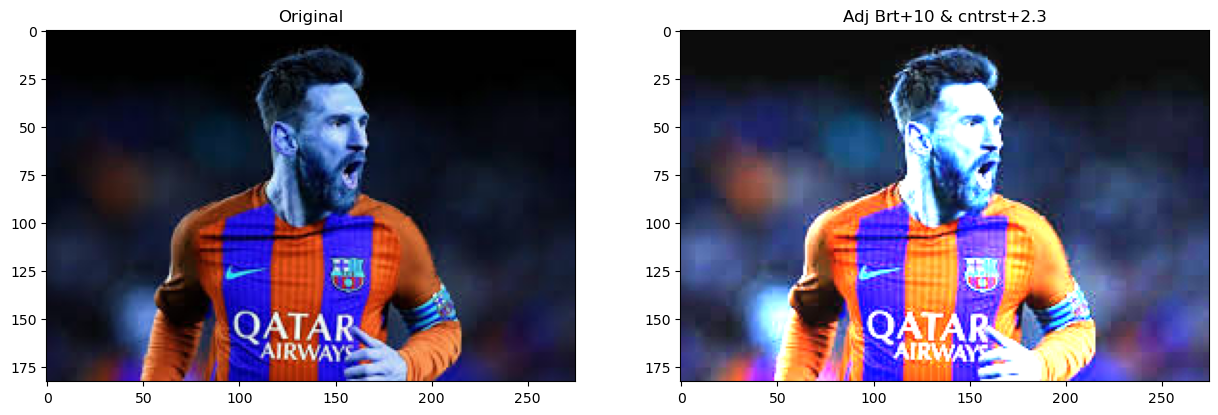

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

image = cv2.imread('./images/messi2.jpeg')
  
brightness = 10  # Adjust the brightness by adding 10 to each pixel value
contrast = 2.3  # Adjusts the contrast by scaling the pixel values by 2.3
image2 = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)

# cv2.imwrite('modified_image.jpg', image2) # Save the image

figure(figsize=(15, 10), dpi=100)  

plt.subplot(1, 2, 1), plt.title("Original"), plt.imshow(image)
plt.subplot(1, 2, 2), plt.title("Adj Brt+10 & cntrst+2.3"), plt.imshow(image2)
plt.show()

### ● Another method for adjusting the brightness and contrast of an image   

- is to use the **cv2.convertScaleAbs()** function,   
>- which allows you to adjust the brightness and contrast using a combination of scaling and shifting the pixel values.  

- The brightness and contrast are adjusted using a combination of scaling and shifting the pixel values.   
>- You can adjust the values of alpha and beta to achieve the desired level of brightness and contrast.  
>- Adjust the brightness and contrast 
> $$ g(i,j) = α⋅f(i,j) + β$$


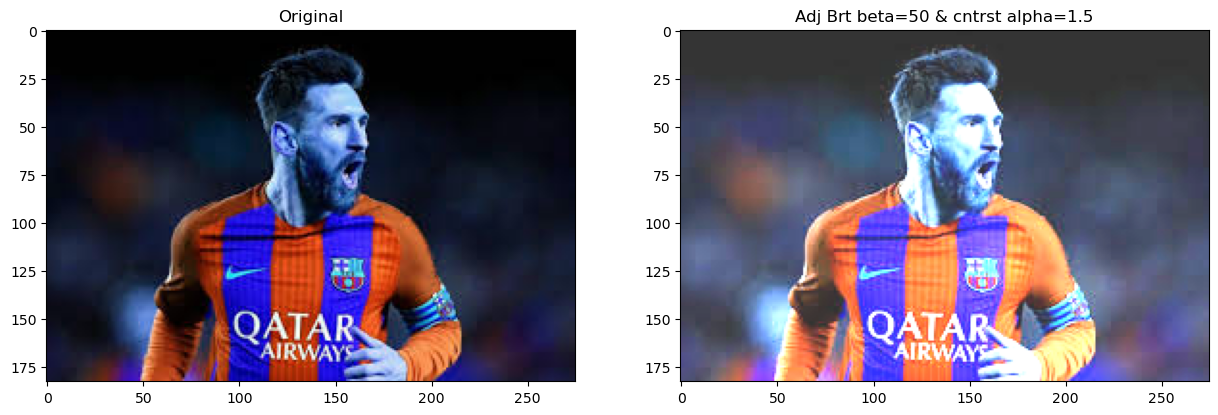

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
  
image = cv2.imread('./images/messi2.jpeg')
  
# Adjust the brightness and contrast 
alpha = 1.5  # control Contrast by 1.5
beta = 50  # control brightness by 50
image2 = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
  
# cv2.imwrite('Brightness & contrast.jpg', image2)

figure(figsize=(15, 10), dpi=100)  

plt.subplot(1, 2, 1), plt.title("Original"), plt.imshow(image)
plt.subplot(1, 2, 2), plt.title("Adj Brt beta=50 & cntrst alpha=1.5"), plt.imshow(image2)
plt.show()

In [3]:
import cv2
def BrtCnst_ctrl(bright=0):
    bright = cv2.getTrackbarPos('bright', 'Brt_Contrast_Window')
    contrast = cv2.getTrackbarPos('contrast', 'Brt_Contrast_Window')
    result = apply_brightness_contrast(img,bright,contrast)
    cv2.namedWindow('Ajusted_Result', cv2.WINDOW_NORMAL)
#     cv2.resizeWindow("Ajusted_Result", 400, 500)
    cv2.imshow('Ajusted_Result', result)
    
def apply_brightness_contrast(input_img, brightness = 255, contrast = 127):
    brightness = map(brightness, 0, 510, -255, 255)
    contrast = map(contrast, 0, 254, -127, 127)
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    if contrast != 0:
        f = float(131 * (contrast + 127)) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)
    cv2.putText(buf,'B:{},C:{}'.format(brightness,contrast),(10, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    return buf

def map(x, in_min, in_max, out_min, out_max):
    return int((x-in_min) * (out_max-out_min) / (in_max-in_min) + out_min)

original = cv2.imread('./images/messi2.jpeg', 1)
img = original.copy()
cv2.namedWindow('Brt_Contrast_Window', cv2.WINDOW_NORMAL)
bright = 255
contrast = 127
cv2.createTrackbar('bright', 'Brt_Contrast_Window', bright, 2*255, BrtCnst_ctrl) # Brightness value range -255 to 255
cv2.createTrackbar('contrast', 'Brt_Contrast_Window', contrast, 2*127, BrtCnst_ctrl) # Contrast value range -127 to 127
BrtCnst_ctrl(0)
cv2.imshow('Brt_Contrast_Window', original)
cv2.waitKey(0)
cv2.destroyAllWindows()

## ▶ Sharpening Image

Sharpening is the process of enhancing the edges and fine details in an image to make it appear sharper and more defined.  
One common method for sharpening images using OpenCV and Python is to use the cv2.filter2D() function, which convolves the image with a kernel.   
The kernel can be designed to enhance the edges in the image, resulting in a sharper image.
- kernels are used for the process of blurring images, sharpening images, embossing, edge detection, and much more.   
- A kernel is known by other names such as:
>- Convolution Matrix, Mask or Matrix/Array.

- it is the kernel that brings about a change in pixel formation and intensity when multiplied with the pixels in the original image.  
- multiplying by a particular kernel (array of values) will bring about a specific change in the image presentation.  
- A few of the commonly used kernels are as follows:
### cv2 Kernels
<img src = './images/kernel.png' align='left' width=400 height=600>  <img src = './images/kernel2.png' width=400 height=600>  

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_cat = plt.imread('./images/cats/cat.jpg')
img_dog = plt.imread('./images/dogs/01.jpg')
print(img_dog.shape)

(128, 128, 3)


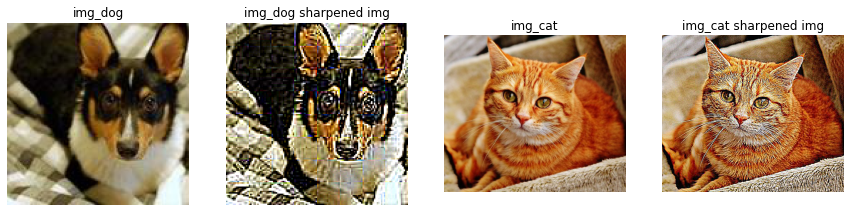

In [6]:
krnl_sp1 = np.array([[-1,-1,-1],
                   [-1,5,-1],
                   [-1,-1,-1]])
krnl_sp2 = np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]])

# filter 2D
img_dog_sp = cv2.filter2D(img_dog, -1, krnl_sp2 ) # -1 for depth
img_cat_sp = cv2.filter2D(img_cat, -1, krnl_sp2 ) # -1 for depth

fig, axs = plt.subplots(1,4,figsize=(15,15))
axs[0].imshow(img_dog), axs[0].axis('off'), axs[0].set_title('img_dog')
axs[1].imshow(img_dog_sp), axs[1].axis('off'), axs[1].set_title('img_dog sharpened img')
axs[2].imshow(img_cat), axs[2].axis('off'), axs[2].set_title('img_cat')
axs[3].imshow(img_cat_sp), axs[3].axis('off'), axs[3].set_title('img_cat sharpened img')
plt.show()  


## ● Another method for sharpening images  ;

- is to use the **cv2.Laplacian()** function,   
>- which calculates the Laplacian of an image and returns the result as a sharpened image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


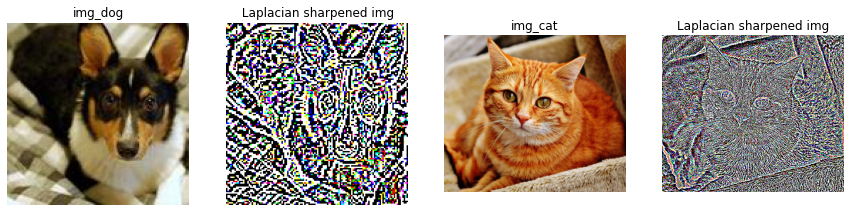

In [7]:
sharpened_image2_dog = cv2.Laplacian(img_dog, cv2.CV_64F) # You can adjust the depth of the output image using the cv2.CV_64F parameter.
sharpened_image2_cat = cv2.Laplacian(img_cat, cv2.CV_64F)

fig, axs = plt.subplots(1,4,figsize=(15,15))
axs[0].imshow(img_dog), axs[0].axis('off'), axs[0].set_title('img_dog')
axs[1].imshow(sharpened_image2_dog), axs[1].axis('off'), axs[1].set_title(' Laplacian sharpened img')
axs[2].imshow(img_cat), axs[2].axis('off'), axs[2].set_title('img_cat')
axs[3].imshow(sharpened_image2_cat), axs[3].axis('off'), axs[3].set_title('Laplacian sharpened img')
plt.show() 

## ▶ Blurring Img

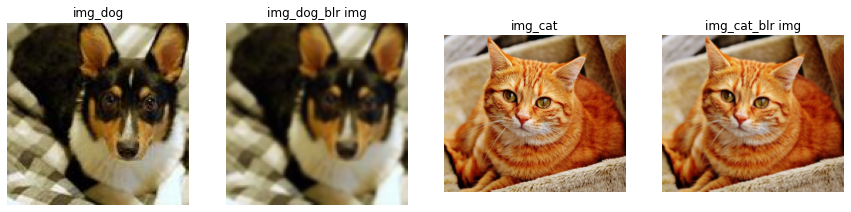

In [8]:
krnl_blr = np.ones((3,3), np.float32) / 9
img_dog_blr = cv2.filter2D(img_dog, -1, krnl_blr )
img_cat_blr = cv2.filter2D(img_cat, -1, krnl_blr )

fig, axs = plt.subplots(1,4,figsize=(15,15))
axs[0].imshow(img_dog), axs[0].axis('off'), axs[0].set_title('img_dog')
axs[1].imshow(img_dog_blr), axs[1].axis('off'), axs[1].set_title('img_dog_blr img')
axs[2].imshow(img_cat), axs[2].axis('off'), axs[2].set_title('img_cat')
axs[3].imshow(img_cat_blr), axs[3].axis('off'), axs[3].set_title('img_cat_blr img')
plt.show()  

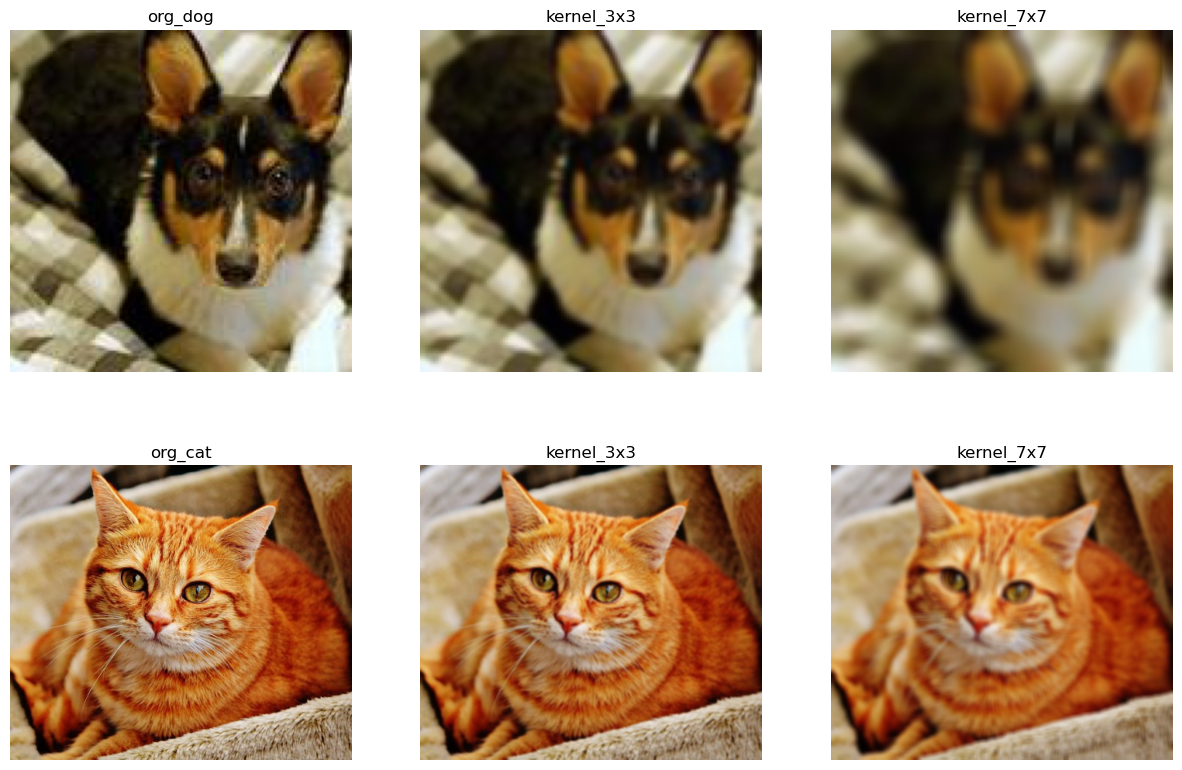

In [9]:
kernel_3x3 = np.ones((3, 3), np.float32) / 9
kernel_7x7 = np.ones((7, 7), np.float32) / 49
img_dog_blr = cv2.filter2D(img_dog, -1, kernel_3x3 )
img_cat_blr = cv2.filter2D(img_cat, -1, kernel_3x3 )
img_dog_blr2 = cv2.filter2D(img_dog, -1, kernel_7x7 )
img_cat_blr2 = cv2.filter2D(img_cat, -1, kernel_7x7 )


import matplotlib.pylab as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

titles = ['org_dog', 'kernel_3x3', 'kernel_7x7', 'org_cat','kernel_3x3','kernel_7x7']
images = [img_dog, img_dog_blr, img_dog_blr2, img_cat, img_cat_blr, img_cat_blr2 ]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i])
    plt.title(titles[i]), plt.axis('off')
plt.show()

## ▶ Removing noise from images  

Noise reduction is the process of removing or reducing unwanted noise or artifacts from an image. 
There are several techniques for reducing noise, including using filters such as the median filter or the Gaussian filter.   
It is important to apply noise reduction judiciously to avoid blur or loss of detail in the image.

One common method for removing noise from images using the **cv2.medianBlur()** function is to use a median filter.   
- The median filter works by replacing each pixel in the image with the median value of a set of neighboring pixels.   
- This can help to smooth out noise and reduce artifacts in the image.


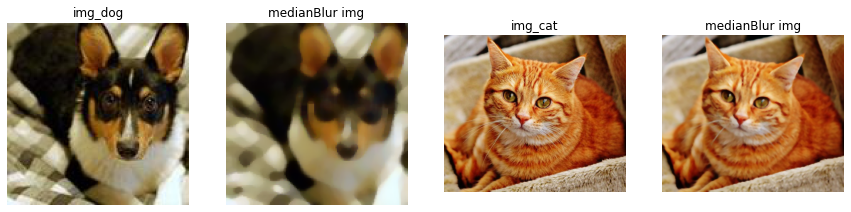

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_cat = plt.imread('./images/cats/cat.jpg')
img_dog = plt.imread('./images/dogs/01.jpg')
# print(img_dog.shape)
filtered_image_cat = cv2.medianBlur(img_cat, 5) # You can adjust the kernel size, odd no.
filtered_image_dog = cv2.medianBlur(img_dog, 7)

fig, axs = plt.subplots(1,4,figsize=(15,15))
axs[0].imshow(img_dog), axs[0].axis('off'), axs[0].set_title('img_dog')
axs[1].imshow(filtered_image_dog), axs[1].axis('off'), axs[1].set_title('medianBlur img')
axs[2].imshow(img_cat), axs[2].axis('off'), axs[2].set_title('img_cat')
axs[3].imshow(filtered_image_cat), axs[3].axis('off'), axs[3].set_title('medianBlur img')
plt.show()  

## ● Another method for removing noise from images :

- is to use a Gaussian filter,   
- which uses a weighted average of neighboring pixels to smooth out noise and reduce artifacts.   
- You can use the **cv2.GaussianBlur()** function to apply a Gaussian filter to an image.

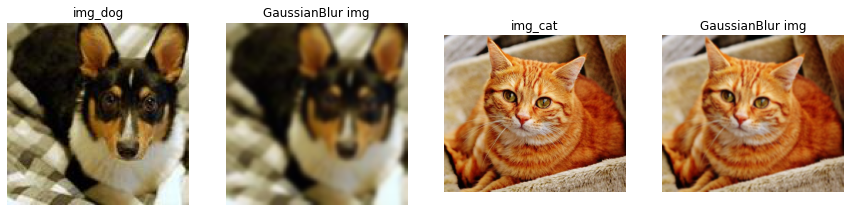

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_cat = plt.imread('./images/cats/cat.jpg')
img_dog = plt.imread('./images/dogs/01.jpg')
# print(img_dog.shape)
filtered_image2_dog = cv2.GaussianBlur(img_dog, (7, 7), 0) # You can adjust the kernel size, odd no.
filtered_image2_cat = cv2.GaussianBlur(img_cat, (7, 7), 0)

fig, axs = plt.subplots(1,4,figsize=(15,15))
axs[0].imshow(img_dog), axs[0].axis('off'), axs[0].set_title('img_dog')
axs[1].imshow(filtered_image2_dog), axs[1].axis('off'), axs[1].set_title('GaussianBlur img')
axs[2].imshow(img_cat), axs[2].axis('off'), axs[2].set_title('img_cat')
axs[3].imshow(filtered_image2_cat), axs[3].axis('off'), axs[3].set_title('GaussianBlur img')
plt.show()  

## ▶ Histogram  

A histogram is a graph of a frequency distribution table.
- Gives you overall idea about the intensity distribution of an image.  

To put it simply, it is a graph of how many things there are.
Displaying the pixel values of an image as a histogram helps you analyze the image.
- For example, count how many pixels with a pixel value of 1,   
- how many pixels with 2 pixels,   
- and how many pixels with 255 pixels in the entire image, etc.

By doing this, you can determine the distribution of the pixels in color and contrast.  

~ Syntax:  
    
* **plt.hist(img.ravel(),maxNo,[range])**  

~ Pameters: 
    
- img.ravel() : src img and histo function
- maxNo : max number of pixel - 256  
- range : pixel range - 0 ~ 256        

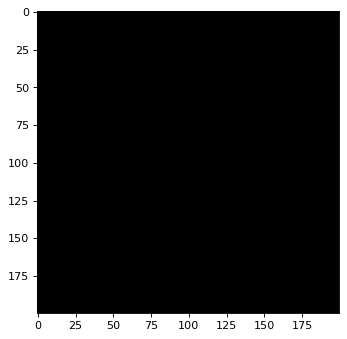

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from matplotlib.pyplot import figure

figure(figsize=(5, 5), dpi=80)

# img = cv2.imread('./images/blank.jpg') # 
img = np.zeros((200,200), np.uint8) # black img

plt.imshow(img, cmap='gray') 
plt.show()

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [ ]:
# Add white img on the black img
cv2.rectangle(img, (0, 100), (200,200), 255, -1) # below half change to white (fm 0 width, 100 h)

plt.hist(img.ravel(),256,[0,256])
plt.show()

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
cv2.rectangle(img, (0, 100), (200,200), 255, -1) # below half change to white (fm 0 width, 100 h)
cv2.rectangle(img, (0, 50), (100,100), 127, -1)

plt.hist(img.ravel(),256,[0,256])
plt.show()

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('./images/lena.jpg',0)

plt.hist(img.ravel(),256,[0,256])
plt.show()

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

### ● Get BGR values

In [ ]:
img = cv2.imread('./images/lena.jpg')

b,g,r = cv2.split(img)

# plt.hist(img.ravel(),256,[0,256])
plt.hist(b.ravel(),256,[0,256])
plt.hist(g.ravel(),256,[0,256])
plt.hist(r.ravel(),256,[0,256])
plt.show()

cv2.imshow('img', img)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.waitKey()
cv2.destroyAllWindows()

### ● Opencv-python cv2 method  

~ Syntax:
    
- **cv2.calHist([img], [channel], mask, [histSize], [ranges])**  

~ Parameters:
    
- [img]: [img]
- [channel]: list type - one chnl: [0], two chnls: [0, 1], three chnls: [0, 1, 2]
- mask: Histogram counts only the pixels specified in the mask, None : all
- histSize: No of Bin, one chnl: [256], two chnls: [256, 256], three chnls: [256, 256, 256]
- ranges: RGB - [0, 256]

~ Example: Plotting Histograms using Matplotlib plotting functions

In [ ]:
img = cv2.imread('./images/lena.jpg')

hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.plot(hist),plt.title('Hist_cv2')
plt.show()

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./images/lena.jpg')

color = ('b','g','r')
for i,col in enumerate(color):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color = col)
    plt.xlim([0,256])

plt.show()